In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import copy, math, random
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print_graph(graph, number_of_nodes, graph_degree, size=(8, 6)):
    plt.figure(figsize=size)
    nx.draw_networkx(graph, node_color='yellow')
    plt.title("Number of nodes: {} - Graph degree: {}".format(number_of_nodes, graph_degree))


In [3]:
def cons_sni_graph_by_nodes(number_of_nodes, draw_graph = False, size=(8,6)):
    sni_graph = nx.Graph(graph_type='SNI')
    sni_graph.add_node('p')
    node_num = 1
    graph_degree = (number_of_nodes + 1) / 2
    if graph_degree.is_integer() == False:
        return print(f"Can not construct stepwipe graph with {number_of_nodes} nodes.")
    else:
        graph_degree = int(graph_degree)
    for i in range(graph_degree):
        sni_graph.add_node(node_num)
        sni_graph.add_edge('p', node_num)
        node_num += 1
    for j in range(graph_degree - 2):
        sni_graph.add_node(node_num)
        for k in range(1, graph_degree + 1):
            sni_graph.add_edge(node_num, k)
        node_num += 1
    if draw_graph:
        print_graph(sni_graph, number_of_nodes, graph_degree, size)
    return sni_graph


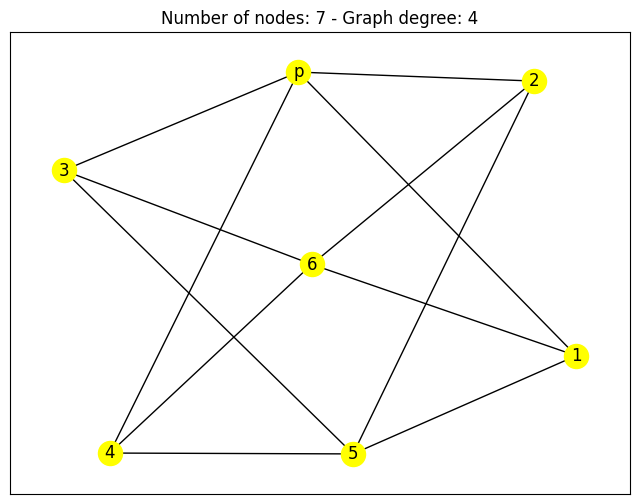

In [4]:
sni_graph = cons_sni_graph_by_nodes(7, draw_graph=True)

In [5]:
def cons_sni_graph_by_degree(graph_degree, draw_graph = False, size=(8.6)):
    sni_graph = nx.Graph(graph_type='SNI')
    sni_graph.add_node('p')
    node_num = 1
    number_of_nodes = 2*graph_degree - 1
    for i in range(graph_degree):
        sni_graph.add_node(node_num)
        sni_graph.add_edge('p', node_num)
        node_num += 1
    for j in range(graph_degree - 2):
        sni_graph.add_node(node_num)
        for k in range(1, graph_degree + 1):
            sni_graph.add_edge(node_num, k)
        node_num += 1
    if draw_graph:
        print_graph(sni_graph, number_of_nodes, graph_degree, size)
    return sni_graph

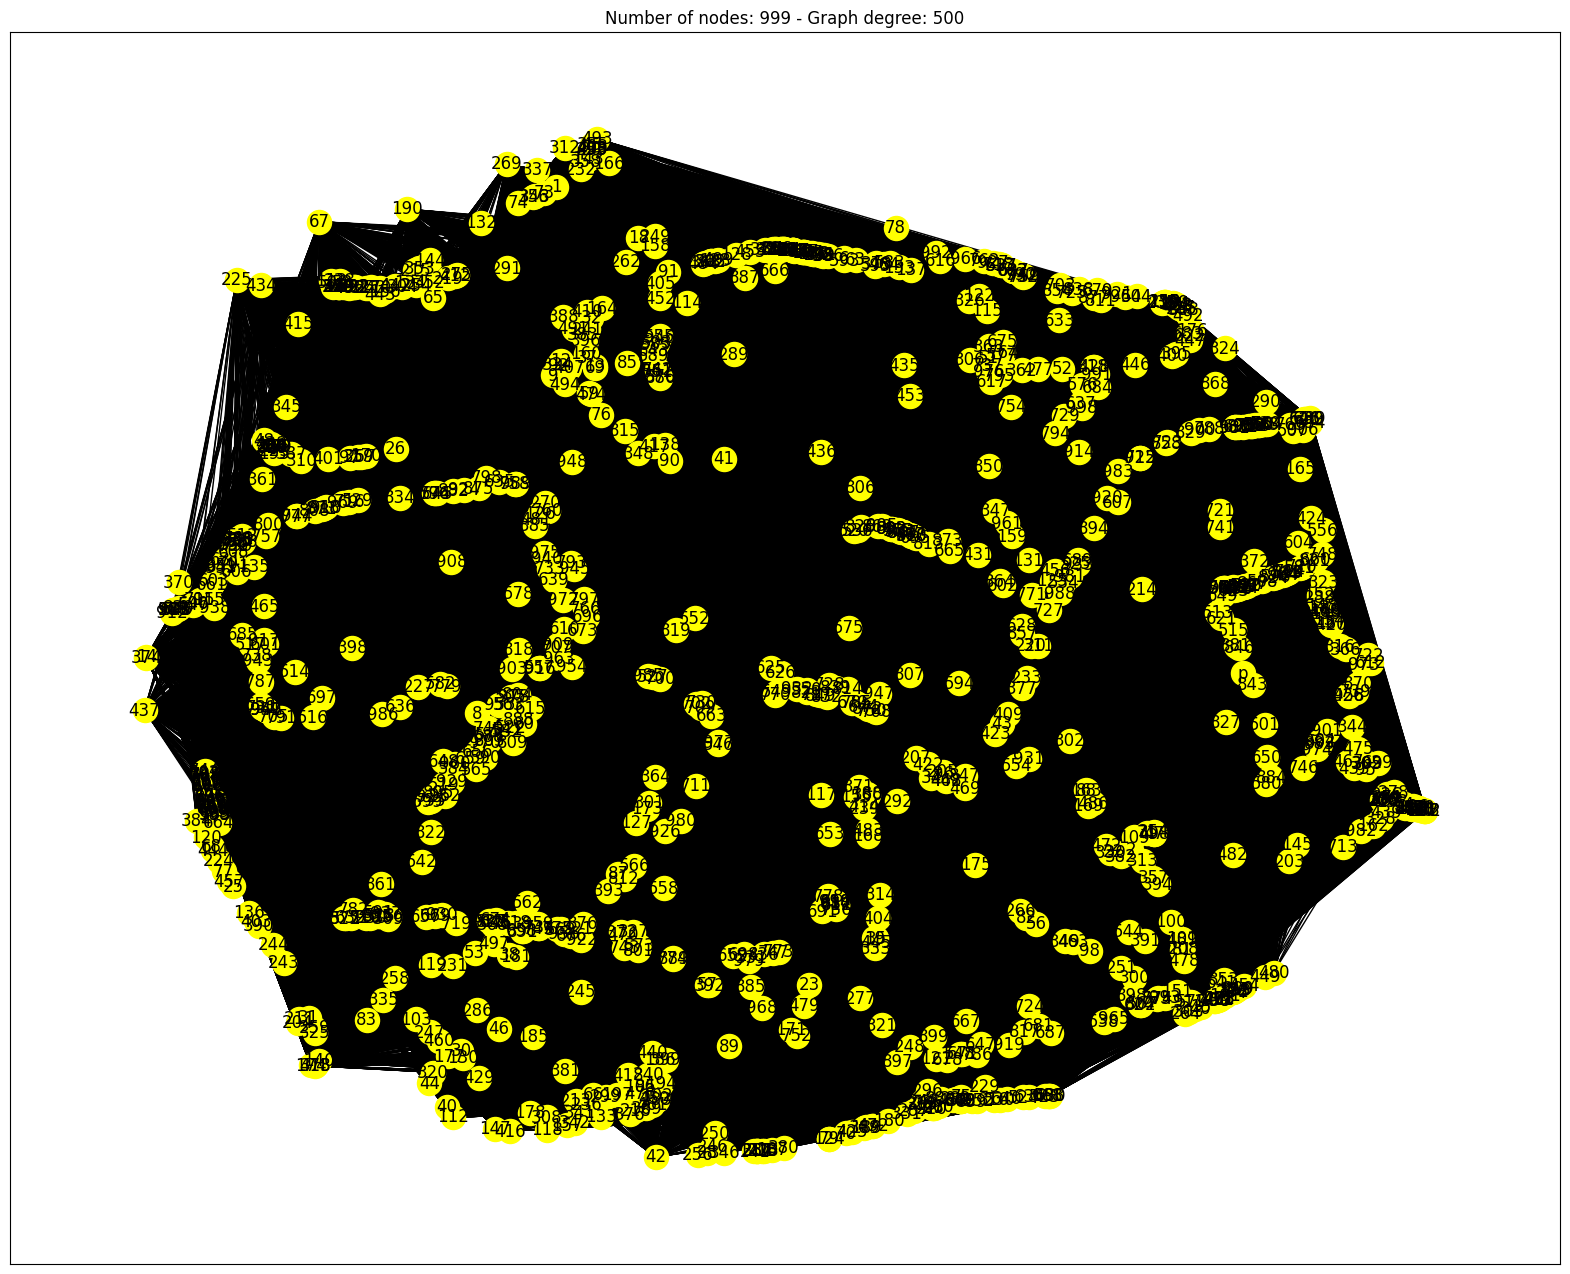

In [6]:
sni_graph = cons_sni_graph_by_degree(500, draw_graph=True, size=(20, 16))

In [7]:
print(len(sni_graph.nodes))
print(sni_graph.degree)

999
[('p', 500), (1, 499), (2, 499), (3, 499), (4, 499), (5, 499), (6, 499), (7, 499), (8, 499), (9, 499), (10, 499), (11, 499), (12, 499), (13, 499), (14, 499), (15, 499), (16, 499), (17, 499), (18, 499), (19, 499), (20, 499), (21, 499), (22, 499), (23, 499), (24, 499), (25, 499), (26, 499), (27, 499), (28, 499), (29, 499), (30, 499), (31, 499), (32, 499), (33, 499), (34, 499), (35, 499), (36, 499), (37, 499), (38, 499), (39, 499), (40, 499), (41, 499), (42, 499), (43, 499), (44, 499), (45, 499), (46, 499), (47, 499), (48, 499), (49, 499), (50, 499), (51, 499), (52, 499), (53, 499), (54, 499), (55, 499), (56, 499), (57, 499), (58, 499), (59, 499), (60, 499), (61, 499), (62, 499), (63, 499), (64, 499), (65, 499), (66, 499), (67, 499), (68, 499), (69, 499), (70, 499), (71, 499), (72, 499), (73, 499), (74, 499), (75, 499), (76, 499), (77, 499), (78, 499), (79, 499), (80, 499), (81, 499), (82, 499), (83, 499), (84, 499), (85, 499), (86, 499), (87, 499), (88, 499), (89, 499), (90, 499), (9

In [8]:
# Get adjacency matrix
A = nx.to_numpy_array(sni_graph)
print(A)


[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [9]:
# Calculate det of adjacency matrix
print(A.shape)
print(np.linalg.det(A))

(999, 999)
0.0


CALCULATE FRAGILITY

In [10]:
def fragility(graph):
    # Get adjacency matrix
    adjacency_matrix = nx.to_numpy_array(graph)
    # Calculate det of adjacency matrix
    eignevalues, eigenvectors = np.linalg.eig(adjacency_matrix)
    fragility = -max(eignevalues)
    return fragility

fragility(sni_graph)

(-499.4997497496875-0j)

CALCULATE RESILIENCE

In [11]:
def get_nodes_degree(graph):
    nodes_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    return nodes_degree


def get_giant_component(graph):
    connected_components = sorted(
        nx.connected_components(graph), key=len, reverse=True)
    giant_component = connected_components[0]
    return connected_components, giant_component


In [12]:
def plot_graph(graph, fig_number, removed='node', title=None):
    plt.figure(fig_number)
    nx.draw_networkx(graph, node_color='yellow')
    if title == None:
        plt.title("Initial graph")
    else:
        plt.title("Removed {}: {}".format(removed, title))


In [13]:
def get_edge_degree(graph):
    edge_list = list(graph.edges())
    edge_degree = []
    for edge in edge_list:
        edge_degree.append(graph.degree(edge[0])+graph.degree(edge[1]) - 2)
    return sorted(edge_degree)


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

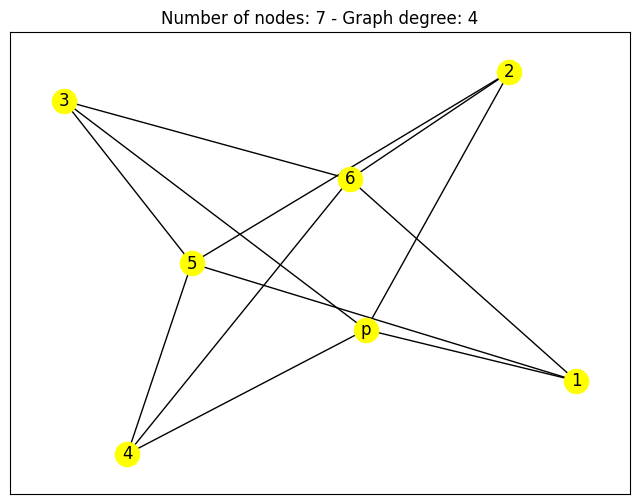

In [14]:
graph = cons_sni_graph_by_nodes(7, draw_graph=True)
get_edge_degree(graph)

In [15]:
def edge_attack(graph, edge_removal='random', print_figures=False, connectivity_probability=0):
    df = pd.DataFrame(columns=['Removed Edge', 'Connected Components', 'Giant Components', 'Length of GC',
                      'Total Edges', 'Resilience', 'Total Resilience', 'Fragility'], dtype=object)
    init_graph_fragility = fragility(graph)
    total_resilience = 0
    total_nodes = len(graph.nodes)
    total_edges = len(graph.edges)
    edges_to_remove = round((1-connectivity_probability)*len(graph.edges))
    if print_figures:
        plot_graph(graph, -1)
    for i in range(edges_to_remove):
        if edge_removal == 'max_degree':
            edge_to_remove = get_edge_degree[0]
            graph.remove_edge(edge_to_remove[0], edge_to_remove[1])
        else:
            random_number = random.randrange(len(graph.edges))
            edge_to_remove = list(graph.edges)[random_number]
            graph.remove_edge(edge_to_remove[0], edge_to_remove[1])
        if print_figures:
            plot_graph(graph, i, removed='edge', title=edge_to_remove)
        CC, GC = get_giant_component(graph)
        total_edges = len(graph.edges)
        if len(GC) > 1:
            resilience = (len(GC)/(total_nodes**2))
            total_resilience += resilience
            subgraph_fragility = fragility(graph)
            # -- Print Data -- #
            df.loc[i] = [edge_to_remove, CC, GC, len(GC), total_edges, resilience,
                         total_resilience, subgraph_fragility]
            GC_graph = graph.subgraph(CC[0])
            graph = nx.Graph(GC_graph)
        else:
            break
    return df, total_resilience, init_graph_fragility


Resilience: 1.5679012345679015, Fragility: (-4.472135954999579-0j)


,Removed Edge,Connected Components,Giant Components,Length of GC,Total Edges,Resilience,Total Resilience,Fragility
0,"(1, 8)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,19,0.111111,0.111111,-4.283212-0.000000j
1,"(4, 8)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,18,0.111111,0.222222,-4.115490+0.000000j
2,"(5, 6)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,17,0.111111,0.333333,-3.897632-0.000000j
3,"(3, 7)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,16,0.111111,0.444444,-3.655834+0.000000j
4,"(5, 7)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,15,0.111111,0.555556,-3.499707+0.000000j
5,"(p, 2)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,14,0.111111,0.666667,-3.205333+0.000000j
6,"(2, 7)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,13,0.111111,0.777778,-3.057568+0.000000j
7,"(p, 5)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,12,0.111111,0.888889,-2.931219+0.000000j
8,"(p, 3)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,11,0.111111,1.000000,-2.707034+0.000000j
9,"(p, 1)","[{1, 2, 3, 4, 5, 6, 7, 8, p}]","{1, 2, 3, 4, 5, 6, 7, 8, p}",9,10,0.111111,1.111111,-2.540903+0.000000j


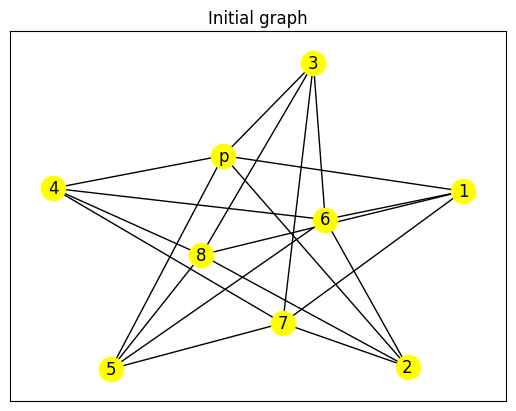

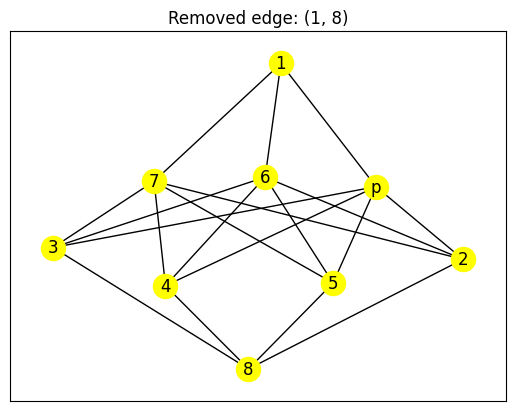

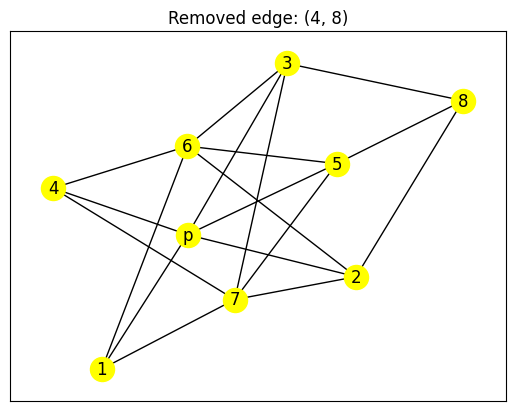

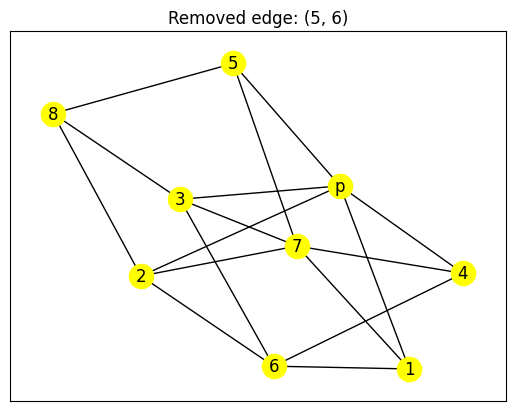

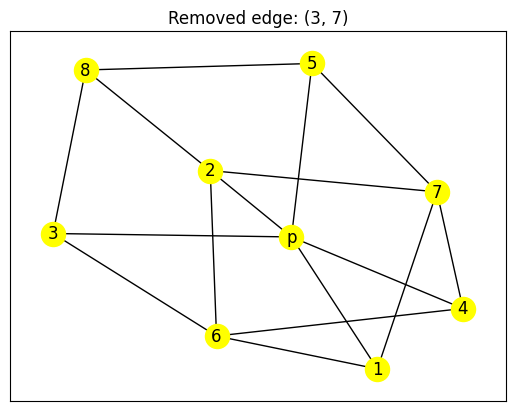

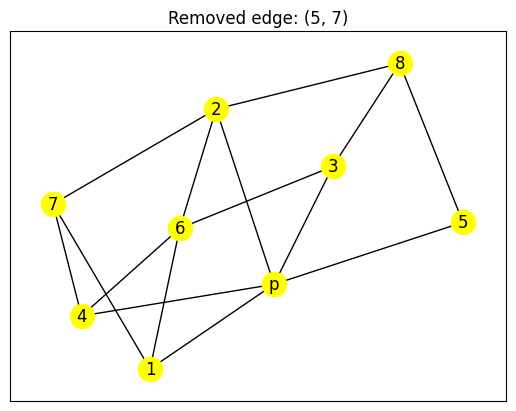

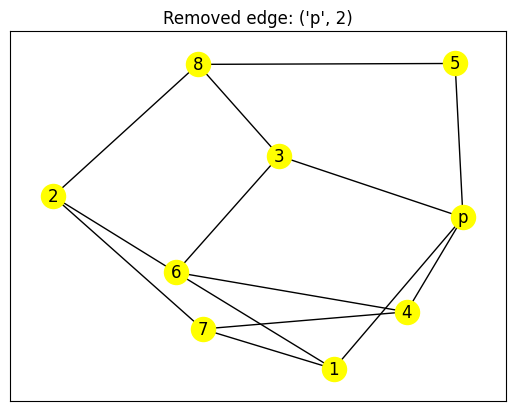

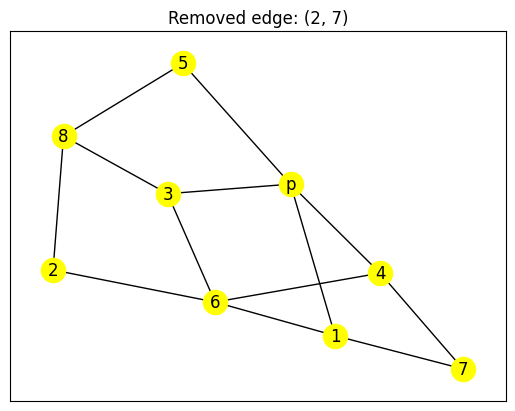

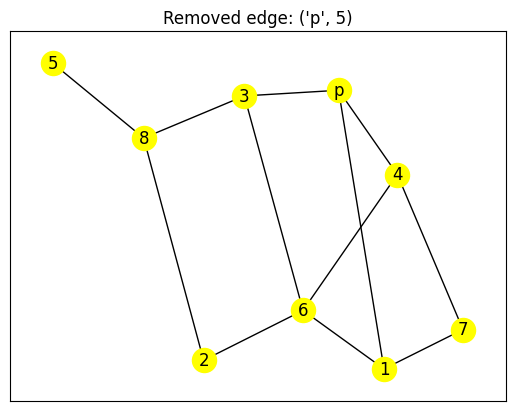

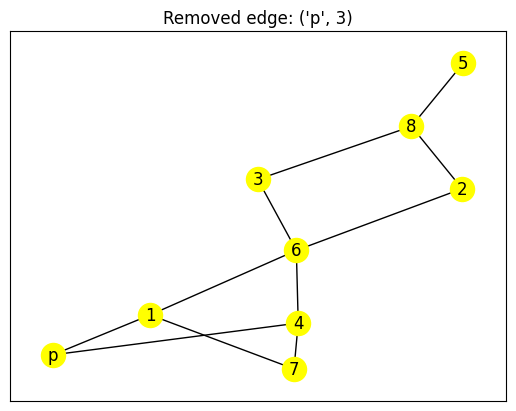

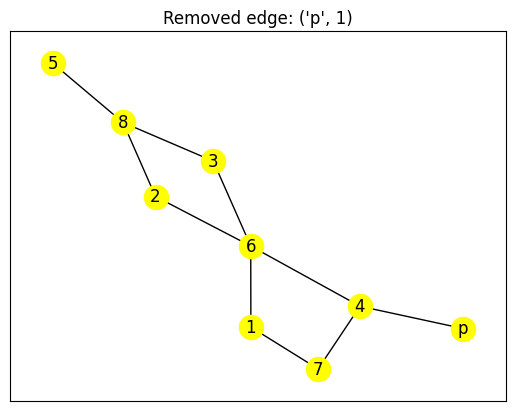

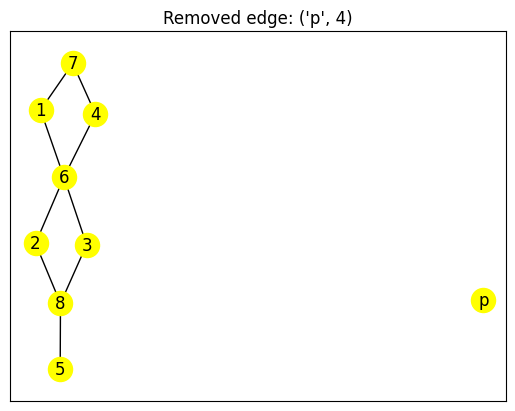

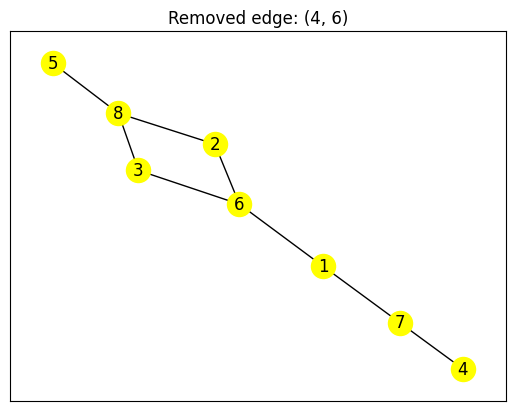

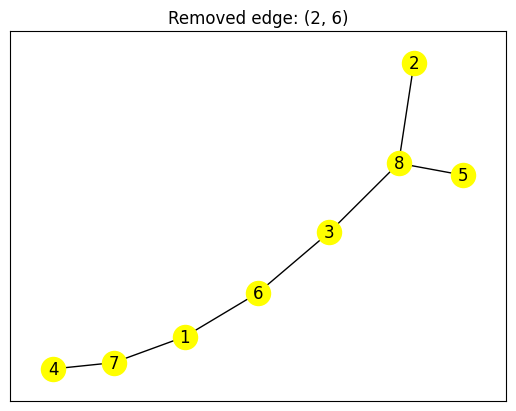

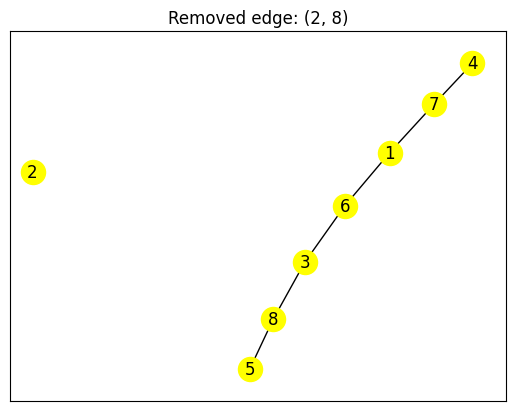

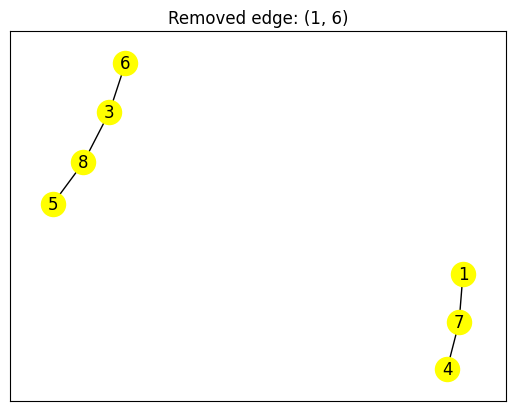

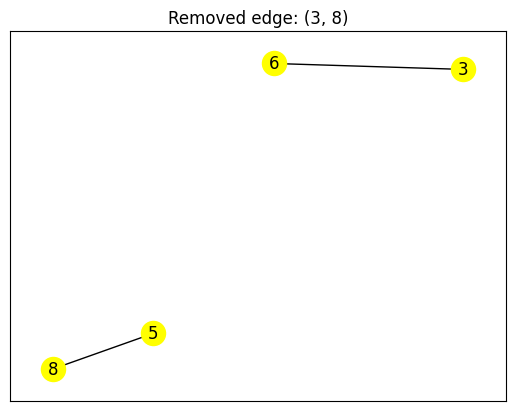

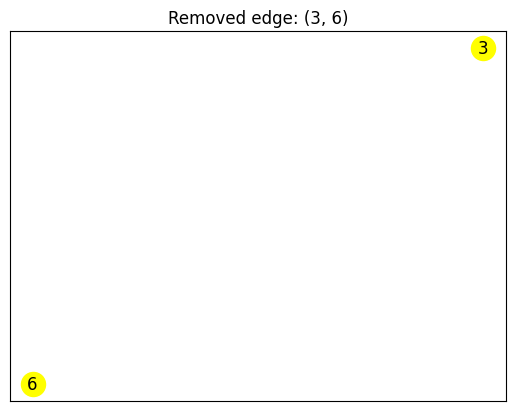

In [167]:
dummy_graph = cons_sni_graph_by_degree(5)
output, total_resilience, curr_fragility = edge_attack(
    dummy_graph, edge_removal='random', print_figures=True, connectivity_probability=0.0)
print("Resilience: {}, Fragility: {}".format(total_resilience, curr_fragility))
output


In [204]:
def node_attack(graph, node_removal = 'random', print_figures = False, connectivity_probability=0):
    df = pd.DataFrame(columns=['Removed Node', 'Connected Components', 'Giant Components', 'Length of GC',
                      'Total Nodes', 'Resilience', 'Total Resilience', 'Fragility'], dtype=object)
    nodes_degree = get_nodes_degree(graph)
    init_graph_fragility = fragility(graph)
    total_resilience = 0
    total_nodes = len(graph.nodes)
    nodes_to_remove = round((1-connectivity_probability)*len(graph.nodes))
    if print_figures:
        plot_graph(graph, -1)
    for i in range(nodes_to_remove):
        if node_removal == 'max_degree':
            node_to_remove = nodes_degree[i][0]
            graph.remove_node(node_to_remove)
        else:
            random_number = random.randrange(len(graph.nodes))
            node_to_remove = list(graph.nodes)[random_number]
            graph.remove_node(node_to_remove)
        if print_figures:
            plot_graph(graph, i, node_to_remove)
        CC, GC = get_giant_component(graph)
        if len(GC) > 1 :
            resilience = (len(GC)/(total_nodes**2))
            total_resilience += resilience
            subgraph_fragility = fragility(graph)
            # -- Print Data -- #
            df.loc[i] = [node_to_remove, CC, GC, len(GC), total_nodes, resilience,
                total_resilience, subgraph_fragility]
        else:
            break
    return df, total_resilience, init_graph_fragility


10
Resilience: 0.3739612188365651, Fragility: (-9.486832980505136-0j)


,Removed Node,Connected Components,Giant Components,Length of GC,Total Nodes,Resilience,Total Resilience,Fragility
0,13,"[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 1...","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",18,19,0.049861,0.049861,-8.944272-0.000000j
1,5,"[{1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, ...","{1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...",17,19,0.047091,0.096953,-8.485281-0.000000j
2,3,"[{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16,...","{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, ...",16,19,0.044321,0.141274,-8.000000-0.000000j
3,p,"[{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16,...","{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, ...",15,19,0.041551,0.182825,-7.483315-0.000000j
4,15,"[{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17,...","{1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18}",14,19,0.038781,0.221607,-6.928203-0.000000j
5,1,"[{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18}]","{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18}",13,19,0.036011,0.257618,-6.480741+0.000000j
6,18,"[{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17}]","{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17}",12,19,0.033241,0.290859,-5.916080+0.000000j
7,16,"[{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 17}]","{2, 4, 6, 7, 8, 9, 10, 11, 12, 14, 17}",11,19,0.030471,0.321330,-5.291503+0.000000j
8,2,"[{4, 6, 7, 8, 9, 10, 11, 12, 14, 17}]","{4, 6, 7, 8, 9, 10, 11, 12, 14, 17}",10,19,0.027701,0.349030,-4.898979+0.000000j
9,10,"[{4, 6, 7, 8, 9, 11, 12, 14, 17}]","{4, 6, 7, 8, 9, 11, 12, 14, 17}",9,19,0.024931,0.373961,-4.472136+0.000000j


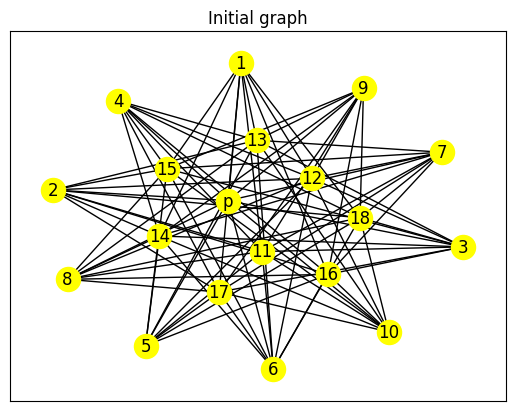

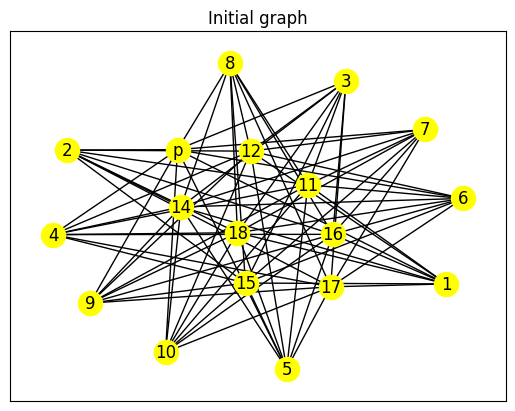

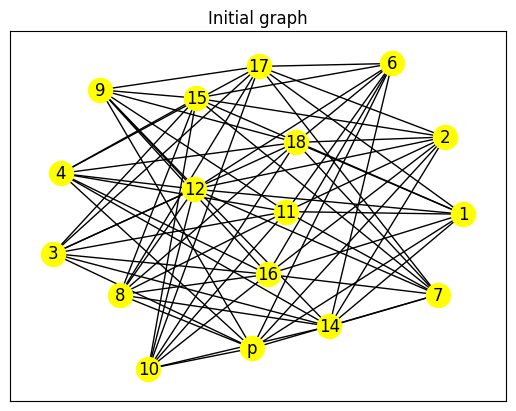

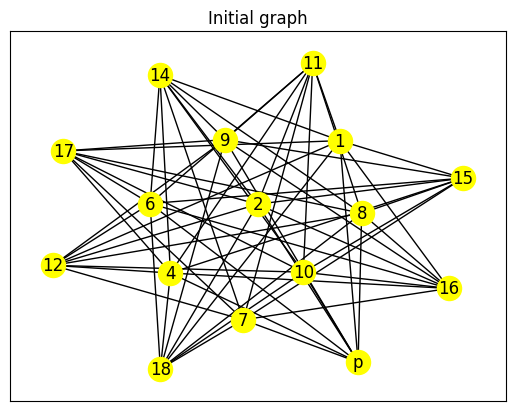

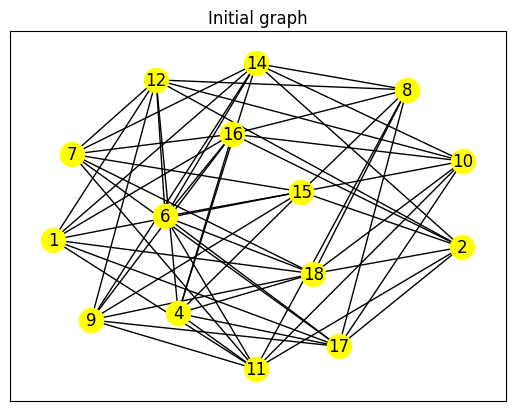

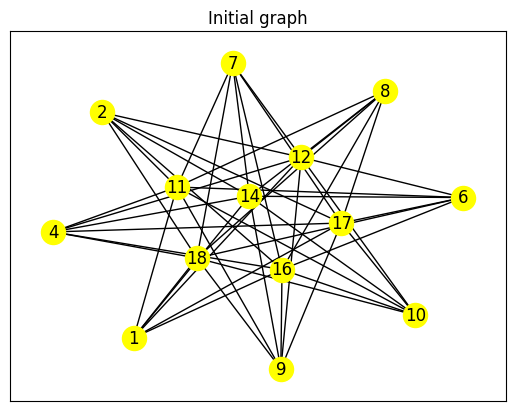

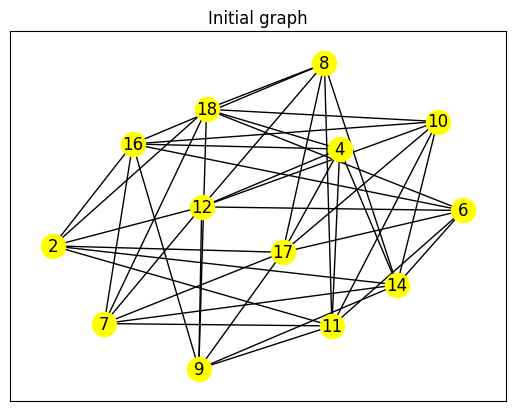

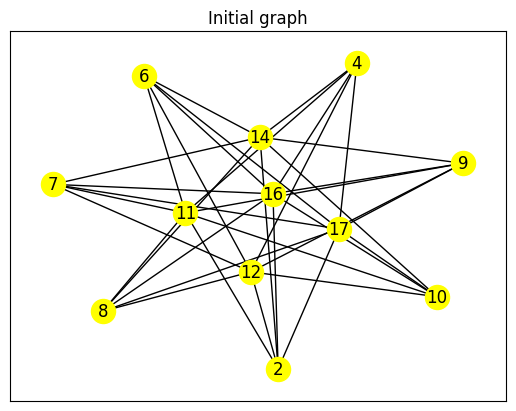

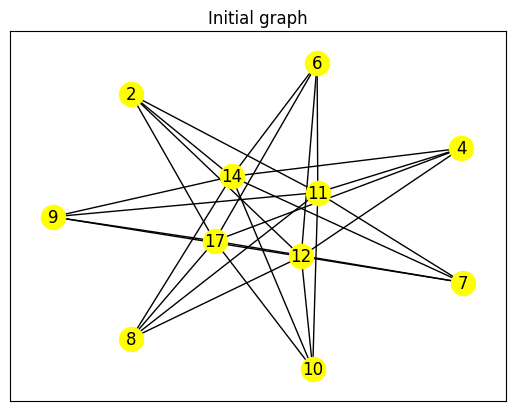

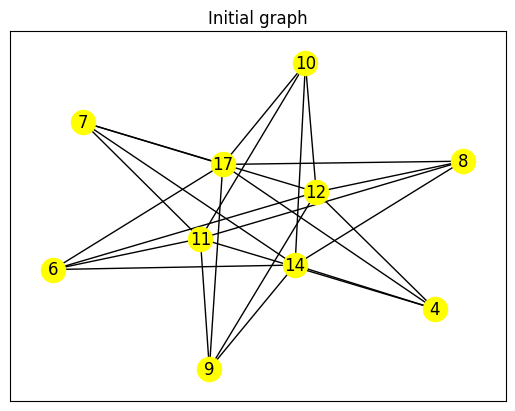

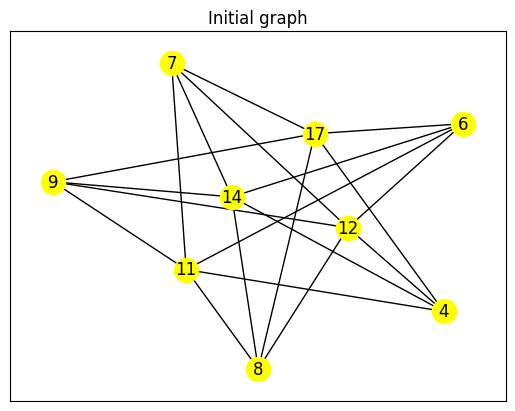

In [189]:
dummy_graph = cons_sni_graph_by_degree(10)
output, total_resilience, curr_fragility = node_attack(
    dummy_graph, node_removal='random', print_figures=True, connectivity_probability=0.5)
print("Resilience: {}, Fragility: {}".format(total_resilience, curr_fragility))
output


SIMULATION

In [217]:
def simulate_node_attack(iteration , graph, connectivity_probability):
    df = pd.DataFrame(columns=['Resilience', 'Fragility'], dtype=object)
    dummy_graph = cons_sni_graph_by_degree(10)
    for i in range(iteration):
        x = copy.deepcopy(graph)
        output, total_resilience, curr_fragility = node_attack(x, connectivity_probability=connectivity_probability)
        df.loc[i] = [float(total_resilience), float(curr_fragility)]
    return df


NODE ATTACK SIMULATION

In [255]:
# dummy_graph = cons_sni_graph_by_nodes(5)
dummy_graph = cons_sni_graph_by_degree(10)
node_attack_output = simulate_node_attack(50, dummy_graph, 0)
node_attack_output


,Resilience,Fragility
0,0.465374,-9.486833
1,0.457064,-9.486833
2,0.465374,-9.486833
3,0.470914,-9.486833
4,0.470914,-9.486833
5,0.465374,-9.486833
6,0.470914,-9.486833
7,0.470914,-9.486833
8,0.470914,-9.486833
9,0.465374,-9.486833


In [223]:
def simulate_edge_attack(iteration, graph, connectivity_probability):
    df = pd.DataFrame(columns=['Resilience', 'Fragility'], dtype=object)
    for i in range(iteration):
        x = copy.deepcopy(graph)
        output, total_resilience, curr_fragility = edge_attack(x, connectivity_probability=connectivity_probability)
        df.loc[i] = [float(total_resilience), float(curr_fragility)]
    return df


EDGE ATTACK SIMULATION

In [256]:
# dummy_graph = cons_sni_graph_by_nodes(5)
dummy_graph = cons_sni_graph_by_degree(10)
edge_attack_output = simulate_edge_attack(20, dummy_graph, 0)
edge_attack_output


,Resilience,Fragility
0,4.011080,-9.486833
1,3.991690,-9.486833
2,4.102493,-9.486833
3,3.977839,-9.486833
4,3.952909,-9.486833
5,4.127424,-9.486833
6,3.950139,-9.486833
7,4.077562,-9.486833
8,4.016620,-9.486833
9,3.955679,-9.486833


Calculate MSE

In [229]:
resilience_mean, fragility_mean = edge_attack_output.mean(axis=0)
resilience_mean_array = np.full((len(edge_attack_output), 1), resilience_mean)
fragility_mean_array = np.full((len(edge_attack_output), 1), fragility_mean)

resilience_error = mean_squared_error(resilience_mean_array, edge_attack_output['Resilience'])
fragility_error = mean_squared_error(fragility_mean_array, edge_attack_output['Fragility'])
resilience_error, fragility_error

(0.00468489345539095, 3.1554436208840472e-30)

Coefficient of Variation and Standard Deviation

In [230]:
variance = st.variation(edge_attack_output['Resilience'])
standard_deviation = st.gstd(edge_attack_output['Resilience'])
variance, standard_deviation

(0.017154337428916946, 1.0178417029867186)

CONFIDENCE INTERVAL

In [232]:
fragility_ci = st.norm.interval(0.95, loc=fragility_mean, scale=fragility_error)
resilience_ci = st.norm.interval(0.95, loc=resilience_mean, scale=resilience_error)
fragility_ci, resilience_ci


((-9.486832980505138, -9.486832980505138),
 (3.980845478387054, 3.999209923275001))

In [237]:
def calculate_poly(simulation_output, poly_degree=2):
    return np.polynomial.polynomial.Polynomial.fit(simulation_output['Resilience'], simulation_output["Fragility"], poly_degree)


In [238]:
calculate_poly(edge_attack_output, 2)


Polynomial([-9.48683298e+00,  3.13446204e-15,  2.62196149e-16], domain=[3.81717452, 4.13296399], window=[-1.,  1.])

In [264]:
n = 100
# d = 10
resilience_df = pd.DataFrame(columns=['Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
fragility_df = pd.DataFrame(columns=[
                            'Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
for i in range(n):
    res_data , frag_data = [], []
    d = random.randint(5, 80)
    graph = cons_sni_graph_by_degree(d)
    c = 0
    res_data.append(d)
    frag_data.append(d)
    for j in range(10):
        x = copy.deepcopy(graph)
        df, res, frag = node_attack(x, connectivity_probability=c)
        res_data.append(res)
        frag_data.append(float(frag))
        c= c+0.1
    resilience_df.loc[i] = res_data
    fragility_df.loc[i] = frag_data



In [265]:
resilience_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,72.0,0.496357,0.492053,0.476649,0.452345,0.418456,0.374982,0.317766,0.254438,0.181525,0.092767
1,5.0,0.432099,0.432099,0.432099,0.407407,0.370370,0.320988,0.320988,0.259259,0.185185,0.098765
2,25.0,0.487297,0.485631,0.471054,0.446064,0.410662,0.364848,0.320700,0.256143,0.181175,0.095793
3,25.0,0.487297,0.485631,0.471054,0.446064,0.410662,0.364848,0.320700,0.256143,0.181175,0.095793
4,6.0,0.446281,0.446281,0.446281,0.429752,0.404959,0.371901,0.280992,0.223140,0.157025,0.082645
...,...,...,...,...,...,...,...,...,...,...,...
95,49.0,0.494739,0.490063,0.476671,0.451695,0.416091,0.369859,0.319163,0.252737,0.175683,0.097247
96,23.0,0.488395,0.483951,0.471111,0.443951,0.413333,0.363951,0.315556,0.259259,0.177778,0.103704
97,20.0,0.485207,0.483235,0.468771,0.443787,0.408284,0.374753,0.320842,0.256410,0.181460,0.095989
98,59.0,0.495653,0.490905,0.477245,0.452261,0.416758,0.370736,0.319307,0.253123,0.176419,0.096866


In [266]:
resilience_standard_deviation, resilience_coefficient_of_variation = [], []
for i in range(resilience_df.shape[1]-1):
    resilience_standard_deviation.append(st.gstd(resilience_df.iloc[:,i+1]))
    resilience_coefficient_of_variation.append(
        st.variation(resilience_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(resilience_standard_deviation)
print()
print('Coefficient of Variation:')
print(resilience_coefficient_of_variation)


Standard Deviation: 
[1.034348389361699, 1.0265922592669403, 1.0245249775001444, 1.0214415487066668, 1.0207459893605029, 1.030261107535979, 1.0244584777310328, 1.025599652291436, 1.0359609076883496, 1.0787542075558647]

Coefficient of Variation:
[0.032163487873040686, 0.025275177157636147, 0.023241245815598235, 0.020589506211481808, 0.01976958720023037, 0.02837755668138971, 0.023231453316532223, 0.024329100856495065, 0.034486384584644744, 0.07215345493829634]


In [267]:
fragility_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,72.0,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252,-71.498252
1,5.0,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136,-4.472136
2,25.0,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897
3,25.0,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897,-24.494897
4,6.0,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226,-5.477226
...,...,...,...,...,...,...,...,...,...,...,...
95,49.0,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423,-48.497423
96,23.0,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444,-22.494444
97,20.0,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589,-19.493589
98,59.0,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863,-58.497863


In [268]:
fragility_standard_deviation, fragility_coefficient_of_variation = [], []
for i in range(fragility_df.shape[1]-1):
    fragility_standard_deviation.append(st.tstd(fragility_df.iloc[:, i+1]))
    fragility_coefficient_of_variation.append(
        st.variation(fragility_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(fragility_standard_deviation)
print()
print('Coefficient of Variation:')
print(fragility_coefficient_of_variation)


Standard Deviation: 
[21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714, 21.38533534759714]

Coefficient of Variation:
[-0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624, -0.5862701534818624]


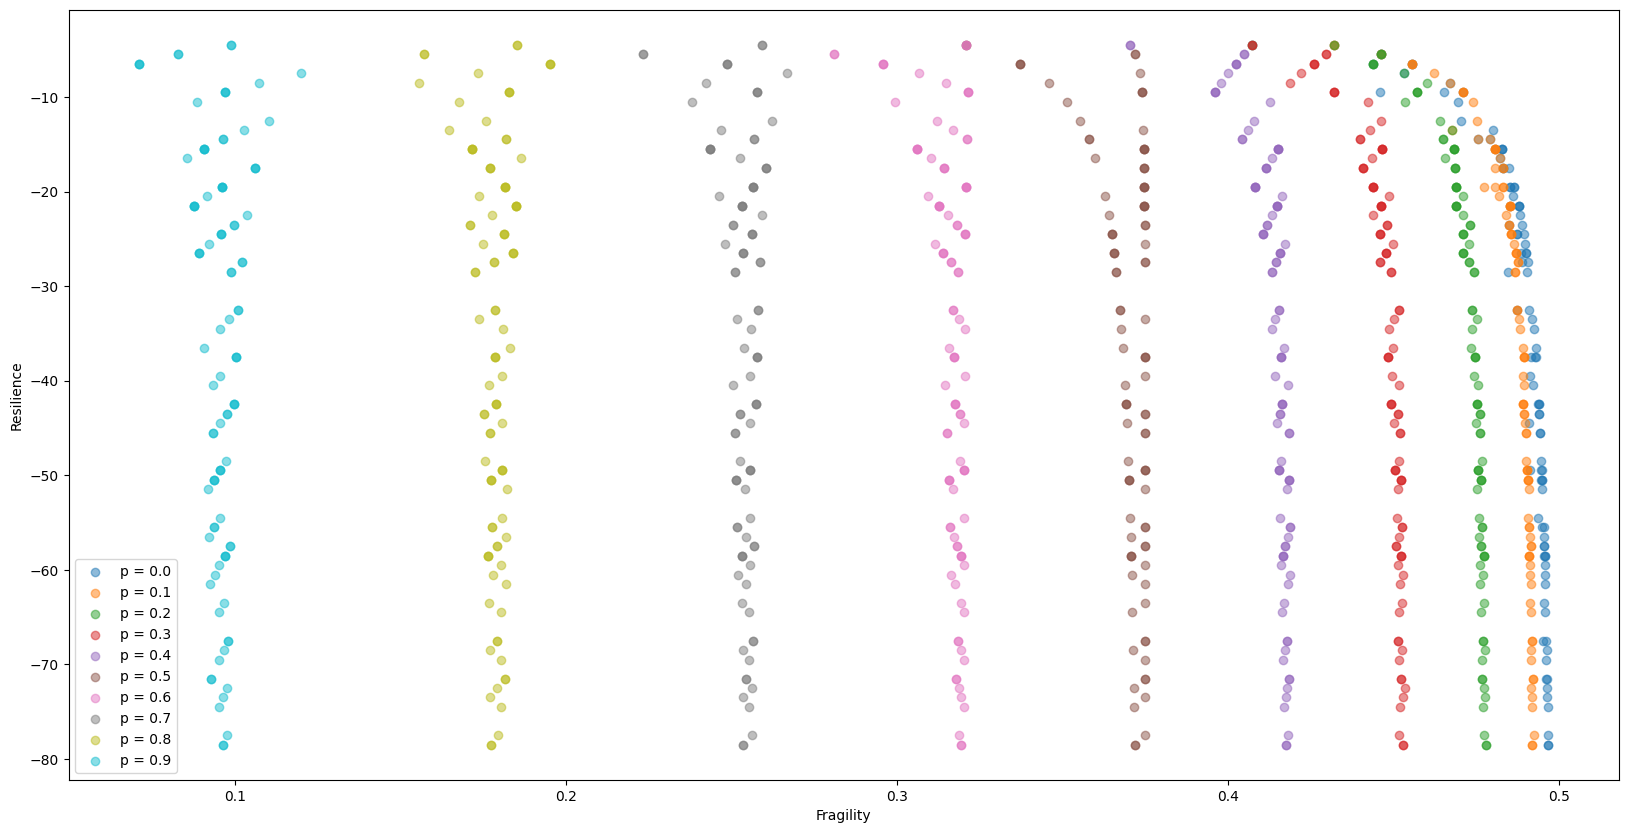

In [275]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(1,11):
    legend = 'p = '+ str((i-1)/10)
    ax.scatter(x=resilience_df.iloc[:, i], y=fragility_df.iloc[:, i], alpha=0.5, label=legend)
plt.xlabel("Fragility")
plt.ylabel("Resilience")
ax.legend()


In [18]:
def simulate(simulation_time):
    resilience_df = pd.DataFrame(columns=['Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    fragility_df = pd.DataFrame(columns=[
                                'Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    for i in range(simulation_time):
        res_data , frag_data = [], []
        d = random.randint(5, 20)
        graph = cons_sni_graph_by_degree(d)
        c = 0
        res_data.append(d)
        frag_data.append(d)
        for j in range(10):
            x = copy.deepcopy(graph)
            df, res, frag = edge_attack(x, connectivity_probability=c)
            res_data.append(res)
            frag_data.append(float(frag))
            c= c+0.1
        resilience_df.loc[i] = res_data
        fragility_df.loc[i] = frag_data
    return resilience_df, fragility_df


In [19]:
resilience_df, fragility_df = simulate(100)

In [20]:
resilience_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9.0,3.577855,3.480969,3.335640,2.941176,2.529412,2.117647,1.705882,1.294118,0.823529,0.411765
1,12.0,4.964083,4.877127,4.519849,4.000000,3.434783,2.869565,2.304348,1.739130,1.130435,0.565217
2,17.0,7.422406,7.284665,6.605142,5.757576,4.939394,4.121212,3.303030,2.484848,1.636364,0.818182
3,19.0,8.435354,8.212564,7.405405,6.459459,5.540541,4.621622,3.702703,2.783784,1.837838,0.918919
4,15.0,6.413793,6.349584,5.778835,5.068966,4.344828,3.620690,2.896552,2.172414,1.448276,0.724138
...,...,...,...,...,...,...,...,...,...,...,...
95,16.0,6.982310,6.854318,6.176899,5.419355,4.645161,3.870968,3.096774,2.322581,1.548387,0.774194
96,14.0,6.020576,5.971193,5.392318,4.703704,4.037037,3.370370,2.703704,2.037037,1.333333,0.666667
97,11.0,4.482993,4.482993,4.154195,3.659864,3.142857,2.619048,2.095238,1.571429,1.047619,0.523810
98,16.0,6.993757,6.861602,6.193548,5.391259,4.645161,3.870968,3.096774,2.322581,1.548387,0.774194


In [21]:
resilience_standard_deviation, resilience_coefficient_of_variation = [], []
for i in range(resilience_df.shape[1]-1):
    resilience_standard_deviation.append(st.gstd(resilience_df.iloc[:,i+1]))
    resilience_coefficient_of_variation.append(
        st.variation(resilience_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(resilience_standard_deviation)
print()
print('Coefficient of Variation:')
print(resilience_coefficient_of_variation)


Standard Deviation: 
[1.677539766894218, 1.6595711488834644, 1.6108269525001224, 1.5855052891326904, 1.5707449921085075, 1.5629658641594952, 1.5598665660259072, 1.5539323749865477, 1.5696663831972362, 1.562756615068658]

Coefficient of Variation:
[0.41770863970061844, 0.41065678283518064, 0.3901036439070343, 0.38211327503209197, 0.3771404792783393, 0.3753986248298483, 0.37463166702813117, 0.3712496974127891, 0.3796983972605963, 0.3749682093634565]


In [22]:
fragility_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9.0,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281,-8.485281
1,12.0,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125,-11.489125
2,17.0,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423,-16.492423
3,19.0,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242,-18.493242
4,15.0,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377,-14.491377
...,...,...,...,...,...,...,...,...,...,...,...
95,16.0,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933
96,14.0,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738,-13.490738
97,11.0,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088,-10.488088
98,16.0,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933,-15.491933


In [23]:
fragility_standard_deviation, fragility_coefficient_of_variation = [], []
for i in range(fragility_df.shape[1]-1):
    fragility_standard_deviation.append(st.tstd(fragility_df.iloc[:, i+1]))
    fragility_coefficient_of_variation.append(
        st.variation(fragility_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(fragility_standard_deviation)
print()
print('Coefficient of Variation:')
print(fragility_coefficient_of_variation)


Standard Deviation: 
[4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007, 4.78900313916007]

Coefficient of Variation:
[-0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269, -0.3737801789244269]


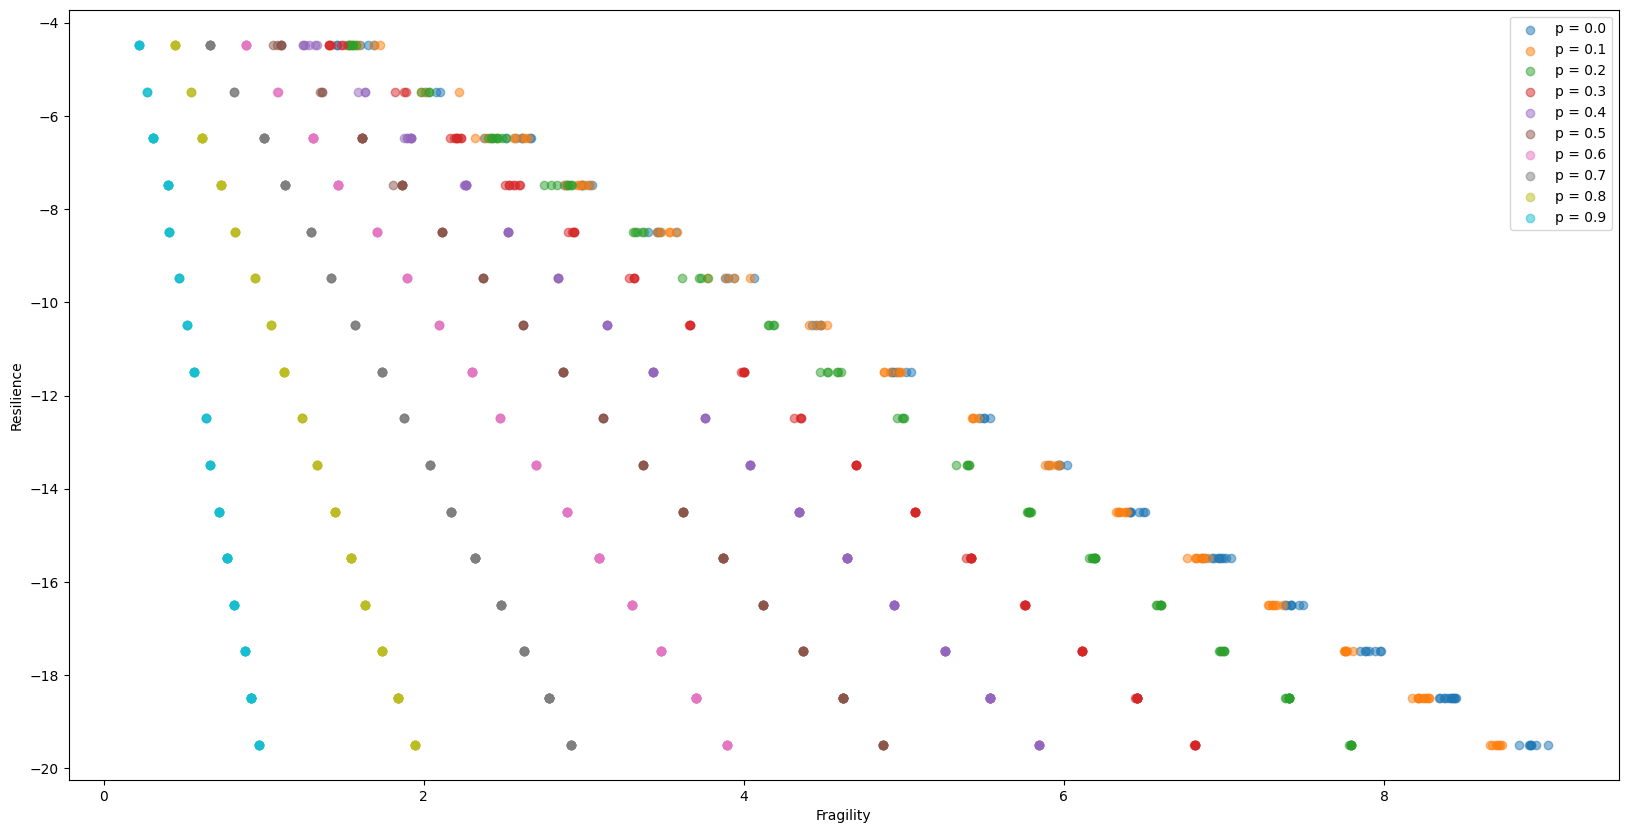

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(1,11):
    legend = 'p = '+ str((i-1)/10)
    ax.scatter(x=resilience_df.iloc[:, i], y=fragility_df.iloc[:, i], alpha=0.5, label=legend)
plt.xlabel("Fragility")
plt.ylabel("Resilience")
ax.legend()
